In [36]:
import pandas as pd
import numpy as np

# Logistic Regression

In [37]:
df = pd.read_csv('titanic_train.csv')

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 52.2+ KB


In [42]:
import seaborn as sns

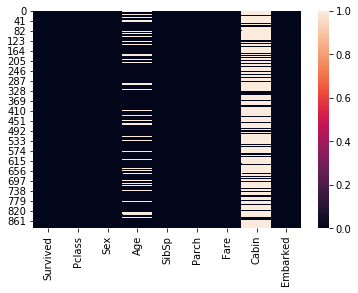

In [43]:
sns.heatmap(df.isnull()) 
#true will be show missing values as 1.0 with white color and False means non-missing values as 0.0 with black color. See below.

In [44]:
df.drop(['Cabin'],axis=1, inplace=True)

In [45]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [46]:
df['Age'].mean()

29.69911764705882

C:\Users\Chintan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


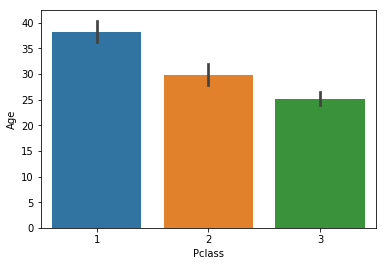

In [47]:
sns.barplot(x='Pclass',y='Age',data=df)

In [48]:
df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [49]:
def impute_age(cols):
    p=cols[0] #will fetch the value of Pclass column/first column from the passed dataframe list
    a=cols[1] #will fetch the value of Age column/second column from the passed dataframe list
    
    if pd.isnull(a): # will check whether age is missing or not.
        if p==1:
            return 38
        elif p==2:
            return 30
        else:
            return 25
    else:
        return a

In [50]:
df['Age']=df[['Pclass','Age']].apply(impute_age,axis=1)
#when we apply function on multi-dimensional dataframe/ one or more column use axis=1 and pass list of column on which you want
#to apply function.

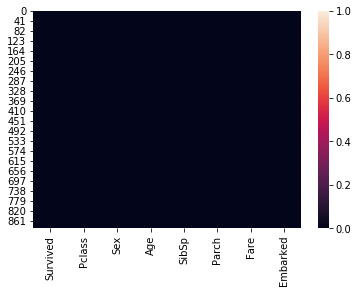

In [51]:
sns.heatmap(df.isnull())

In [52]:
df.dropna(inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


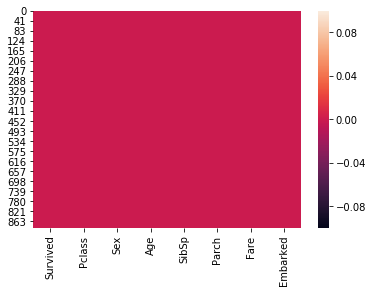

In [54]:
sns.heatmap(df.isnull())

In [55]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [56]:
sex = pd.get_dummies(df['Sex'],drop_first=True) 
embarked = pd.get_dummies(df['Embarked'],drop_first=True)
#get_dummies converts categorial data into numeric with 1 and 0. drop_first=True will remove first column alphabatically.

In [57]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [58]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [59]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [60]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [61]:
data = pd.concat([df,sex,embarked],axis=1) 
#pd.concat with axis =1 (to make it horizontally) will concate data horizontally , by default it concate data vertically

In [62]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [63]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.335549,-0.054934,-0.034040,0.083151,0.255290,-0.541585,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.401322,0.081656,0.016824,-0.548193,0.127741,0.220558,0.076466
Age,-0.054934,-0.401322,1.000000,-0.242834,-0.174280,0.118205,0.085564,-0.070847,0.006325
SibSp,-0.034040,0.081656,-0.242834,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438
Parch,0.083151,0.016824,-0.174280,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512
Fare,0.255290,-0.548193,0.118205,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758
male,-0.541585,0.127741,0.085564,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405
Q,0.004536,0.220558,-0.070847,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
S,-0.151777,0.076466,0.006325,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000


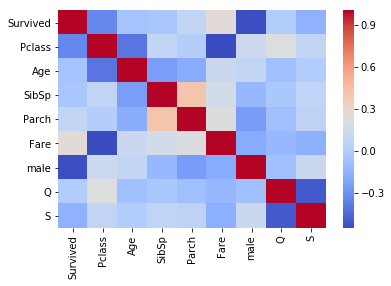

In [64]:
sns.heatmap(data.corr(), cmap='coolwarm')
#darkblue shows -0.5 or no correlation between columns where 1 (dark red) shows string correlation between columns
#correlation value is in range of -1 to 1 but heatmap take 0 to 1.

In [65]:
X=data.drop('Survived',axis=1)

In [66]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [67]:
y=data['Survived']

In [68]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 595 to 533
Data columns (total 8 columns):
Pclass    622 non-null int64
Age       622 non-null float64
SibSp     622 non-null int64
Parch     622 non-null int64
Fare      622 non-null float64
male      622 non-null uint8
Q         622 non-null uint8
S         622 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 31.0 KB


In [72]:
len(y_train)

622

In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 867 to 29
Data columns (total 8 columns):
Pclass    267 non-null int64
Age       267 non-null float64
SibSp     267 non-null int64
Parch     267 non-null int64
Fare      267 non-null float64
male      267 non-null uint8
Q         267 non-null uint8
S         267 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 13.3 KB


In [74]:
len(y_test)

267

In [75]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
595,3,36.00,1,1,24.1500,1,0,1
511,3,25.00,0,0,8.0500,1,0,1
803,3,0.42,0,1,8.5167,1,0,0
571,1,53.00,2,0,51.4792,0,0,1
865,2,42.00,0,0,13.0000,0,0,1


In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr = LogisticRegression()

In [78]:
lr.fit(X_train,y_train) #applied Logisitic Regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
ypred = lr.predict(X_test)

In [80]:
ypred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [82]:
y_test.head()

867    0
766    0
225    0
765    1
9      1
Name: Survived, dtype: int64

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(y_test,ypred)

array([[142,  25],
       [ 30,  70]], dtype=int64)